# Import Data

In [55]:
pip install gdown

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import psycopg2
import pytz
import gdown

In [57]:
dbname = "FinalProject_Rekdat"
user = "postgres"
password = "Weather.Whispers"
host = "rekdat-postgresql.cpm48umoy5cj.ap-southeast-2.rds.amazonaws.com"
port = "5432"

connection = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

## WEATHER DATA

In [59]:
query = "SELECT * FROM weather_data;"
data_weather = pd.read_sql_query(query, connection)
data_weather.drop('id', axis=1, inplace=True)

data_weather['datetime'] = data_weather['datetime'] - pd.Timedelta(hours=7)

<ipython-input-59-c0d062b965ac>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_weather = pd.read_sql_query(query, connection)


In [60]:
data_weather

,datetime,temperature,dew_point,humidity,precipitation,precipitation_prob,wind_speed,cloud_cover,conditions
0,2024-11-16 00:00:00,24.6,22.6,88.64,0.3,100.0,7.9,91.6,"Rain, Overcast"
1,2024-11-16 01:00:00,24.3,22.6,90.25,0.3,100.0,7.9,95.4,"Rain, Overcast"
2,2024-11-16 02:00:00,24.4,22.4,88.63,0.0,0.0,6.8,98.9,Overcast
3,2024-11-16 03:00:00,24.3,22.6,90.25,0.3,100.0,5.4,99.8,"Rain, Overcast"
4,2024-11-16 04:00:00,23.9,22.6,92.44,1.7,100.0,5.4,100.0,"Rain, Overcast"
...,...,...,...,...,...,...,...,...,...
115,2024-11-20 19:00:00,25.6,23.1,86.08,2.8,100.0,5.8,100.0,"Rain, Overcast"
116,2024-11-20 20:00:00,25.7,23.1,85.58,2.3,100.0,3.2,99.6,"Rain, Overcast"
117,2024-11-20 21:00:00,25.9,23.0,84.06,0.9,100.0,1.1,100.0,"Rain, Overcast"
118,2024-11-20 22:00:00,25.6,22.9,85.05,0.3,100.0,1.1,99.4,"Rain, Overcast"


In [61]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            120 non-null    datetime64[ns]
 1   temperature         120 non-null    float64       
 2   dew_point           120 non-null    float64       
 3   humidity            120 non-null    float64       
 4   precipitation       120 non-null    float64       
 5   precipitation_prob  120 non-null    float64       
 6   wind_speed          120 non-null    float64       
 7   cloud_cover         120 non-null    float64       
 8   conditions          120 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 8.6+ KB


## TWITTER DATA : HUJAN

In [62]:
file_id = "1aC57FatkI8e5D0bzq9XNe9w4X4O05Nw0"
url = f"https://drive.google.com/uc?id={file_id}"
output = "hujan_19.csv"
gdown.download(url, output, quiet=False)
tweets_hujan_19 = pd.read_csv(output)
tweets_hujan_19

Downloading...
From: https://drive.google.com/uc?id=1aC57FatkI8e5D0bzq9XNe9w4X4O05Nw0
To: /content/hujan_19.csv
100%|██████████| 14.1k/14.1k [00:00<00:00, 16.9MB/s]


,Author ID,Date Created,Number of Likes,Number of Replies,Source of Tweet,Tweet
0,1223171620912562176,2024-11-19 09:51:12+00:00,0,0,NaN,Jogja kenapa anda hujan 🥲
1,1141684914,2024-11-19 09:49:25+00:00,0,1,NaN,Ini emang sesuah itu ya nyari ojek online klo ...
2,1812046665832091648,2024-11-19 09:45:59+00:00,0,0,NaN,@Princeeoff Jogja ujan
3,3192553326,2024-11-19 09:43:09+00:00,0,0,NaN,"RT @staklim_jogja: Haloo sobat BMKG Jogja,\nBe..."
4,1646007198500401152,2024-11-19 09:40:13+00:00,0,1,NaN,@mas_matth Jogja juga hujan mass plis🙂‍↔️
...,...,...,...,...,...,...
95,328389816,2024-11-19 00:01:32+00:00,0,1,NaN,lapor pak @erickthohir ini jogja ujan dikit se...
96,1794606304260243456,2024-11-18 21:41:35+00:00,0,0,NaN,Jogja waktu hujan https://t.co/yB4nxzgt2D
97,1856973135423373312,2024-11-18 18:35:57+00:00,0,0,NaN,"RT @susumanis2929: Jogja mang ujan ya, pantes ..."
98,980870263888752640,2024-11-18 15:58:23+00:00,0,0,NaN,Aaaa terharuu bgt tb tb nelpon karena dia liat...


In [63]:
file_id = "1HCC2r-h_LP3DsgHYFzmK1HFli3nUyOf9"
url = f"https://drive.google.com/uc?id={file_id}"
output = "hujan_20.csv"
gdown.download(url, output, quiet=False)
tweets_hujan_20 = pd.read_csv(output)
tweets_hujan_20

Downloading...
From: https://drive.google.com/uc?id=1HCC2r-h_LP3DsgHYFzmK1HFli3nUyOf9
To: /content/hujan_20.csv
100%|██████████| 15.5k/15.5k [00:00<00:00, 21.0MB/s]


,Author ID,Date Created,Number of Likes,Number of Replies,Source of Tweet,Tweet
0,1220873184435560448,2024-11-20 10:20:18+00:00,0,1,NaN,@quixoticue jogja gitu ra kadang beda kecamata...
1,1841347533647564800,2024-11-20 10:19:44+00:00,0,0,NaN,RT @cleo2nd: jogja tiap hari ujan terus 🥲\ncle...
2,2371483640,2024-11-20 10:19:34+00:00,0,0,NaN,RT @cleo2nd: jogja tiap hari ujan terus 🥲\ncle...
3,349159308,2024-11-20 10:16:28+00:00,0,0,NaN,RT @cleo2nd: jogja tiap hari ujan terus 🥲\ncle...
4,1858101308622098432,2024-11-20 10:15:51+00:00,0,0,NaN,RT @BUUI_ZYUSE: jogja hujan deres tp aku masih...
...,...,...,...,...,...,...
92,1845546143507501057,2024-11-19 13:20:54+00:00,0,1,NaN,"doi pulang kerja, w habis jalan sendiri dari j..."
93,1654851817,2024-11-19 13:00:58+00:00,0,0,NaN,RT @yourbbyhoneyy: Jogja hujan dingin ayo adu ...
94,1664838836428623873,2024-11-19 13:00:20+00:00,0,0,NaN,Jogja selalu hujan 😓 https://t.co/d3rDxbp068
95,1894957807,2024-11-19 12:43:26+00:00,0,0,NaN,RT @yourbbyhoneyy: Jogja hujan dingin ayo adu ...


In [64]:
data_tweets_hujan = pd.concat([tweets_hujan_19, tweets_hujan_20], ignore_index=True).drop_duplicates()
data_tweets_hujan

,Author ID,Date Created,Number of Likes,Number of Replies,Source of Tweet,Tweet
0,1223171620912562176,2024-11-19 09:51:12+00:00,0,0,NaN,Jogja kenapa anda hujan 🥲
1,1141684914,2024-11-19 09:49:25+00:00,0,1,NaN,Ini emang sesuah itu ya nyari ojek online klo ...
2,1812046665832091648,2024-11-19 09:45:59+00:00,0,0,NaN,@Princeeoff Jogja ujan
3,3192553326,2024-11-19 09:43:09+00:00,0,0,NaN,"RT @staklim_jogja: Haloo sobat BMKG Jogja,\nBe..."
4,1646007198500401152,2024-11-19 09:40:13+00:00,0,1,NaN,@mas_matth Jogja juga hujan mass plis🙂‍↔️
...,...,...,...,...,...,...
192,1845546143507501057,2024-11-19 13:20:54+00:00,0,1,NaN,"doi pulang kerja, w habis jalan sendiri dari j..."
193,1654851817,2024-11-19 13:00:58+00:00,0,0,NaN,RT @yourbbyhoneyy: Jogja hujan dingin ayo adu ...
194,1664838836428623873,2024-11-19 13:00:20+00:00,0,0,NaN,Jogja selalu hujan 😓 https://t.co/d3rDxbp068
195,1894957807,2024-11-19 12:43:26+00:00,0,0,NaN,RT @yourbbyhoneyy: Jogja hujan dingin ayo adu ...


In [65]:
# Drop kolom Author ID
data_tweets_hujan.drop(columns=['Author ID'], inplace=True)
# Drop kolom Source of Tweets
data_tweets_hujan.drop(columns=['Source of Tweet'], inplace=True)

# Konversi dari text ke datetime
data_tweets_hujan['Date Created'] = pd.to_datetime(data_tweets_hujan['Date Created'])

# Konversi dari GMT ke GMT+7
data_tweets_hujan['Time Created'] = data_tweets_hujan['Date Created'].dt.tz_convert('Asia/Jakarta')
data_tweets_hujan['Time Created'] = data_tweets_hujan['Time Created'].dt.tz_localize(None)
data_tweets_hujan.drop(columns=['Date Created'], inplace=True)
print(data_tweets_hujan.head())

   Number of Likes  Number of Replies  \
0                0                  0   
1                0                  1   
2                0                  0   
3                0                  0   
4                0                  1   

                                               Tweet        Time Created  
0                          Jogja kenapa anda hujan 🥲 2024-11-19 16:51:12  
1  Ini emang sesuah itu ya nyari ojek online klo ... 2024-11-19 16:49:25  
2                             @Princeeoff Jogja ujan 2024-11-19 16:45:59  
3  RT @staklim_jogja: Haloo sobat BMKG Jogja,\nBe... 2024-11-19 16:43:09  
4          @mas_matth Jogja juga hujan mass plis🙂‍↔️ 2024-11-19 16:40:13  


In [66]:
# Sort tweets by the time it's created (descending)
data_tweets_hujan = data_tweets_hujan.sort_values(by='Time Created', ascending=False)

In [67]:
data_tweets_hujan.set_index('Time Created', inplace=True)
hourly_hujan = data_tweets_hujan.resample('1H').agg({
    'Number of Likes': 'sum',  # Sum of likes per hour
    'Number of Replies': 'sum',
    'Tweet': 'count'          # Count of tweets per hour
})

# Rename columns for clarity
hourly_hujan.rename(columns={'Number of Likes': 'Total Likes', 'Number of Replies': 'Total Replies', 'Tweet': 'Tweet Count'}, inplace=True)

# Reset the index for saving to a new CSV
hourly_hujan.reset_index(inplace=True)

print(hourly_hujan)

          Time Created  Total Likes  Total Replies  Tweet Count
0  2024-11-18 21:00:00            0              0            1
1  2024-11-18 22:00:00            0              0            1
2  2024-11-18 23:00:00            0              0            0
3  2024-11-19 00:00:00            0              0            0
4  2024-11-19 01:00:00            0              0            1
5  2024-11-19 02:00:00            0              0            0
6  2024-11-19 03:00:00            0              0            0
7  2024-11-19 04:00:00            0              0            1
8  2024-11-19 05:00:00            0              0            0
9  2024-11-19 06:00:00            0              0            0
10 2024-11-19 07:00:00            0              1            1
11 2024-11-19 08:00:00          124              2            3
12 2024-11-19 09:00:00            0              0            0
13 2024-11-19 10:00:00            0              0            1
14 2024-11-19 11:00:00            0     

<ipython-input-67-4fd2d42d9338>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_hujan = data_tweets_hujan.resample('1H').agg({


## TWITTER DATA : PANAS

In [68]:
file_id = "1qp6shyB40egQ4S5hffU2ueU2Vhczx4Hr"
url = f"https://drive.google.com/uc?id={file_id}"
output = "panas_19.csv"
gdown.download(url, output, quiet=False)
tweets_panas_19 = pd.read_csv(output)
tweets_panas_19

Downloading...
From: https://drive.google.com/uc?id=1qp6shyB40egQ4S5hffU2ueU2Vhczx4Hr
To: /content/panas_19.csv
100%|██████████| 14.0k/14.0k [00:00<00:00, 24.4MB/s]


,Author ID,Date Created,Number of Likes,Number of Replies,Source of Tweet,Tweet
0,1858084022553079808,2024-11-19 13:25:06+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
1,3827120713,2024-11-19 13:14:53+00:00,0,1,NaN,@MuhammadRoiihan @Stakof Hehehee... ini sama s...
2,1821896179258732544,2024-11-19 11:24:59+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
3,1682923910743080961,2024-11-19 11:14:38+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
4,1168492587084218370,2024-11-19 10:36:58+00:00,0,0,NaN,"@hotschokolade @tanyarlfes enak dong, jogja pa..."
...,...,...,...,...,...,...
87,1167638427468099584,2024-11-16 06:34:23+00:00,1,1,NaN,@kalishatio Oh bukan ternyata wkwk btw welcome...
88,1352536888196755456,2024-11-16 06:32:27+00:00,0,1,NaN,@kleenaur iya anjir klaten panas cok pdhl jogj...
89,1223871992236871681,2024-11-16 05:30:00+00:00,0,0,NaN,"klo ada yg bilang jogja panas, engga ajg klate..."
90,1595372548623339520,2024-11-16 05:23:23+00:00,2,1,NaN,"JOGJA PANAS BGT WOYYY, PDHL UDAH KIPASAN DI KO..."


In [69]:
file_id = "1iXaK3Cn3i1P2SxPHik6EWtDEzrwhWXO4"
url = f"https://drive.google.com/uc?id={file_id}"
output = "panas_20.csv"
gdown.download(url, output, quiet=False)
tweets_panas_20 = pd.read_csv(output)
tweets_panas_20

Downloading...
From: https://drive.google.com/uc?id=1iXaK3Cn3i1P2SxPHik6EWtDEzrwhWXO4
To: /content/panas_20.csv
100%|██████████| 13.2k/13.2k [00:00<00:00, 21.5MB/s]


,Author ID,Date Created,Number of Likes,Number of Replies,Source of Tweet,Tweet
0,1651894721227419648,2024-11-20 10:25:06+00:00,0,0,NaN,RT @VnB_couple: kegiatan kami klo lg makan dil...
1,1147008389416804352,2024-11-20 10:08:30+00:00,0,0,NaN,RT @lampuapill: @radarjogja @area_jogja Jane b...
2,519328866,2024-11-20 09:36:16+00:00,0,0,NaN,Jogja siang panas sorenya ujan badai 😃
3,1858732602334867458,2024-11-20 09:02:31+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
4,893279059253149697,2024-11-20 08:42:21+00:00,0,0,NaN,"Jogja cuaca cuacane anjim tenan, mau seko bant..."
...,...,...,...,...,...,...
83,1788264733688373248,2024-11-17 02:21:40+00:00,2,0,NaN,@theyyupie Kak aku jual tumblr Eiger warna Lil...
84,1408282669423546368,2024-11-17 01:52:50+00:00,0,6,NaN,di jogja jam segini udh panas bgt gkuatt
85,1013790800122077184,2024-11-16 17:42:46+00:00,3,1,NaN,pagi-siang dokum tennis dengan panas jogja mem...
86,1671572162271137792,2024-11-16 16:14:32+00:00,0,1,NaN,"@TehAngetT4war @rntksnduu Benr, jgn mau mas. N..."


In [70]:
data_tweets_panas = pd.concat([tweets_panas_19, tweets_panas_20], ignore_index=True).drop_duplicates()
data_tweets_panas

,Author ID,Date Created,Number of Likes,Number of Replies,Source of Tweet,Tweet
0,1858084022553079808,2024-11-19 13:25:06+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
1,3827120713,2024-11-19 13:14:53+00:00,0,1,NaN,@MuhammadRoiihan @Stakof Hehehee... ini sama s...
2,1821896179258732544,2024-11-19 11:24:59+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
3,1682923910743080961,2024-11-19 11:14:38+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
4,1168492587084218370,2024-11-19 10:36:58+00:00,0,0,NaN,"@hotschokolade @tanyarlfes enak dong, jogja pa..."
...,...,...,...,...,...,...
115,1804815749632212992,2024-11-19 20:19:16+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
116,1856646569233375232,2024-11-19 14:39:10+00:00,0,0,NaN,"RT @pijatpriagempal: Cari yg seger2 yuk , Jogj..."
128,1847263574986788864,2024-11-19 06:50:26+00:00,5,0,NaN,"Cari yg seger2 yuk , Jogja panas guys .. #pija..."
130,2357989027,2024-11-19 05:31:06+00:00,0,1,NaN,panas bgt jogja gakuat😮‍💨😮‍💨😮‍💨😮‍💨 mau semangka


In [71]:
# Drop kolom Author ID
data_tweets_panas.drop(columns=['Author ID'], inplace=True)
# Drop kolom Source of Tweets
data_tweets_panas.drop(columns=['Source of Tweet'], inplace=True)

# Konversi dari text ke datetime
data_tweets_panas['Date Created'] = pd.to_datetime(data_tweets_panas['Date Created'])

# Konversi dari GMT ke GMT+7
data_tweets_panas['Time Created'] = data_tweets_panas['Date Created'].dt.tz_convert('Asia/Jakarta')
data_tweets_panas['Time Created'] = data_tweets_panas['Time Created'].dt.tz_localize(None)
data_tweets_panas.drop(columns=['Date Created'], inplace=True)
print(data_tweets_panas.head())

   Number of Likes  Number of Replies  \
0                0                  0   
1                0                  1   
2                0                  0   
3                0                  0   
4                0                  0   

                                               Tweet        Time Created  
0  RT @pijatpriagempal: Cari yg seger2 yuk , Jogj... 2024-11-19 20:25:06  
1  @MuhammadRoiihan @Stakof Hehehee... ini sama s... 2024-11-19 20:14:53  
2  RT @pijatpriagempal: Cari yg seger2 yuk , Jogj... 2024-11-19 18:24:59  
3  RT @pijatpriagempal: Cari yg seger2 yuk , Jogj... 2024-11-19 18:14:38  
4  @hotschokolade @tanyarlfes enak dong, jogja pa... 2024-11-19 17:36:58  


In [72]:
# Sort tweets by the time it's created (descending)
data_tweets_panas = data_tweets_panas.sort_values(by='Time Created', ascending=False)

In [73]:
data_tweets_panas.set_index('Time Created', inplace=True)
hourly_panas = data_tweets_panas.resample('1H').agg({
    'Number of Likes': 'sum',  # Sum of likes per hour
    'Number of Replies': 'sum',
    'Tweet': 'count'          # Count of tweets per hour
})

# Rename columns for clarity
hourly_panas.rename(columns={'Number of Likes': 'Total Likes', 'Number of Replies': 'Total Replies', 'Tweet': 'Tweet Count'}, inplace=True)

# Reset the index for saving to a new CSV
hourly_panas.reset_index(inplace=True)

print(hourly_panas)

<ipython-input-73-b53421ff6657>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_panas = data_tweets_panas.resample('1H').agg({


           Time Created  Total Likes  Total Replies  Tweet Count
0   2024-11-16 12:00:00            2              1            3
1   2024-11-16 13:00:00            2              2            3
2   2024-11-16 14:00:00            4              2            4
3   2024-11-16 15:00:00            0              1            2
4   2024-11-16 16:00:00            0              1            2
..                  ...          ...            ...          ...
97  2024-11-20 13:00:00            2              1            2
98  2024-11-20 14:00:00            0              2            3
99  2024-11-20 15:00:00            0              2            4
100 2024-11-20 16:00:00            0              0            2
101 2024-11-20 17:00:00            0              0            2

[102 rows x 4 columns]


## Twitter Data : Mendung

In [74]:
file_id = "1Kz1zNdQ20CcZ7_Ohfwogn_5dIog7oz2K"
url = f"https://drive.google.com/uc?id={file_id}"
output = "mendung.csv"
gdown.download(url, output, quiet=False)
tweets_mendung = pd.read_csv(output)
tweets_mendung.head()

Downloading...
From: https://drive.google.com/uc?id=1Kz1zNdQ20CcZ7_Ohfwogn_5dIog7oz2K
To: /content/mendung.csv
100%|██████████| 7.07k/7.07k [00:00<00:00, 13.8MB/s]


,Author ID,Date Created,Number of Likes,Number of Replies,Source of Tweet,Tweet
0,1200094091695910912,2024-11-20 10:32:18+00:00,0,0,NaN,RT @NdoroTedjo: Pemberitahuan utk luwak² batan...
1,1845011533295960064,2024-11-20 10:21:36+00:00,0,0,NaN,Jogja Mendung
2,66355918,2024-11-20 10:13:32+00:00,0,0,NaN,RT @NdoroTedjo: Pemberitahuan utk luwak² batan...
3,134109792,2024-11-20 10:05:36+00:00,0,0,NaN,RT @NdoroTedjo: Pemberitahuan utk luwak² batan...
4,1810743334597783552,2024-11-20 09:56:20+00:00,0,0,NaN,RT @NdoroTedjo: Pemberitahuan utk luwak² batan...


In [76]:
# Drop kolom Author ID
tweets_mendung.drop(columns=['Author ID'], inplace=True)
# Drop kolom Source of Tweets
tweets_mendung.drop(columns=['Source of Tweet'], inplace=True)

# Konversi dari text ke datetime
tweets_mendung['Date Created'] = pd.to_datetime(tweets_mendung['Date Created'])

# Konversi dari GMT ke GMT+7
tweets_mendung['Time Created'] = tweets_mendung['Date Created'].dt.tz_convert('Asia/Jakarta')
tweets_mendung['Time Created'] = tweets_mendung['Time Created'].dt.tz_localize(None)
tweets_mendung.drop(columns=['Date Created'], inplace=True)
print(tweets_mendung.head())

   Number of Likes  Number of Replies  \
0                0                  0   
1                0                  0   
2                0                  0   
3                0                  0   
4                0                  0   

                                               Tweet        Time Created  
0  RT @NdoroTedjo: Pemberitahuan utk luwak² batan... 2024-11-20 17:32:18  
1                                      Jogja Mendung 2024-11-20 17:21:36  
2  RT @NdoroTedjo: Pemberitahuan utk luwak² batan... 2024-11-20 17:13:32  
3  RT @NdoroTedjo: Pemberitahuan utk luwak² batan... 2024-11-20 17:05:36  
4  RT @NdoroTedjo: Pemberitahuan utk luwak² batan... 2024-11-20 16:56:20  


In [77]:
tweets_mendung.set_index('Time Created', inplace=True)
hourly_mendung = tweets_mendung.resample('1H').agg({
    'Number of Likes': 'sum',  # Sum of likes per hour
    'Number of Replies': 'sum',
    'Tweet': 'count'          # Count of tweets per hour
})

# Rename columns for clarity
hourly_mendung.rename(columns={'Number of Likes': 'Total Likes', 'Number of Replies': 'Total Replies', 'Tweet': 'Tweet Count'}, inplace=True)

# Reset the index for saving to a new CSV
hourly_mendung.reset_index(inplace=True)

print(hourly_mendung)

           Time Created  Total Likes  Total Replies  Tweet Count
0   2024-11-13 17:00:00            6              0            1
1   2024-11-13 18:00:00            0              0            1
2   2024-11-13 19:00:00            0              0            0
3   2024-11-13 20:00:00            0              0            0
4   2024-11-13 21:00:00            0              0            0
..                  ...          ...            ...          ...
164 2024-11-20 13:00:00            1              0            2
165 2024-11-20 14:00:00            0              0            0
166 2024-11-20 15:00:00            0              0            0
167 2024-11-20 16:00:00            2              4            2
168 2024-11-20 17:00:00            0              0            4

[169 rows x 4 columns]


<ipython-input-77-903b00c4c020>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_mendung = tweets_mendung.resample('1H').agg({


# Analyze Weather and Twitter Data

## Correlation Analysis

In [78]:
# Rename kolom 'Time Created' agar lebih mudah untuk join
hourly_hujan = hourly_hujan.rename(columns={'Time Created': 'datetime'})

# Lakukan merge (default: inner join)
merged_hujan = pd.merge(data_weather, hourly_hujan, on='datetime', how='inner')

# Tampilkan hasil merge
print(merged_hujan)

              datetime  temperature  dew_point  humidity  precipitation  \
0  2024-11-18 21:00:00         24.7       22.8     89.19            2.6   
1  2024-11-18 22:00:00         24.9       23.0     89.21            2.1   
2  2024-11-18 23:00:00         24.5       23.0     91.36            0.8   
3  2024-11-19 00:00:00         24.4       23.0     91.91            0.3   
4  2024-11-19 01:00:00         24.1       22.6     91.34            0.1   
5  2024-11-19 02:00:00         23.8       22.4     91.88            0.0   
6  2024-11-19 03:00:00         23.5       22.1     91.86            0.8   
7  2024-11-19 04:00:00         23.4       21.9     91.30            0.8   
8  2024-11-19 05:00:00         23.4       21.7     90.19            0.4   
9  2024-11-19 06:00:00         24.5       21.8     84.93            0.1   
10 2024-11-19 07:00:00         25.9       22.3     80.56            0.1   
11 2024-11-19 08:00:00         27.7       22.6     73.80            0.0   
12 2024-11-19 09:00:00   

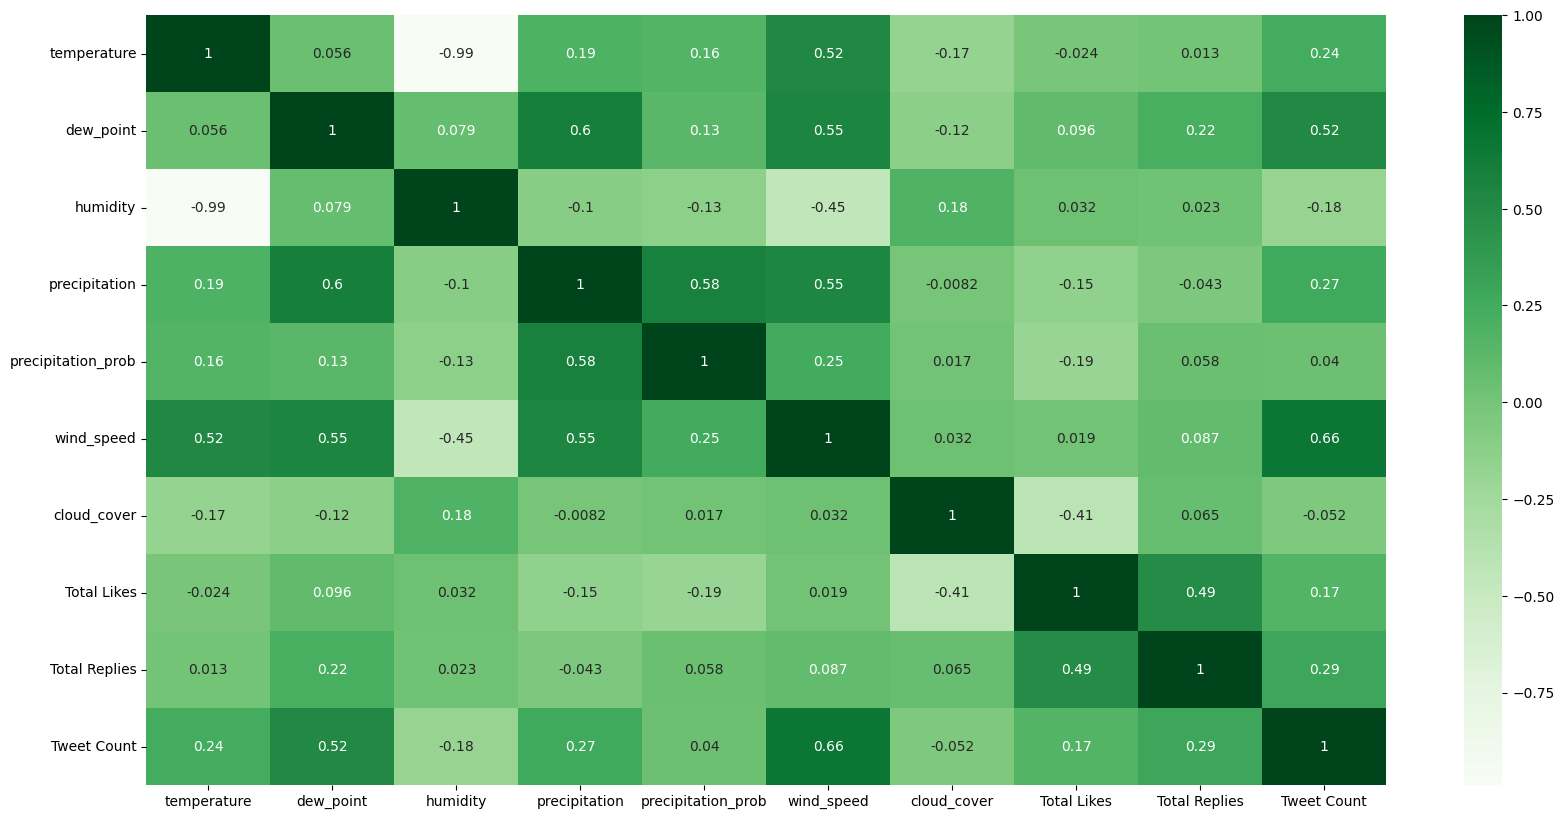

In [79]:
# heatmap of correlation between all the features and value, but exclude datetime and conditions
hujan_corr = merged_hujan.copy()
hujan_corr = hujan_corr.drop(['conditions', 'datetime'], axis = 1)

plt.figure(figsize=(20, 10))
sns.heatmap(hujan_corr.corr(), annot=True, cmap='Greens')
plt.show()

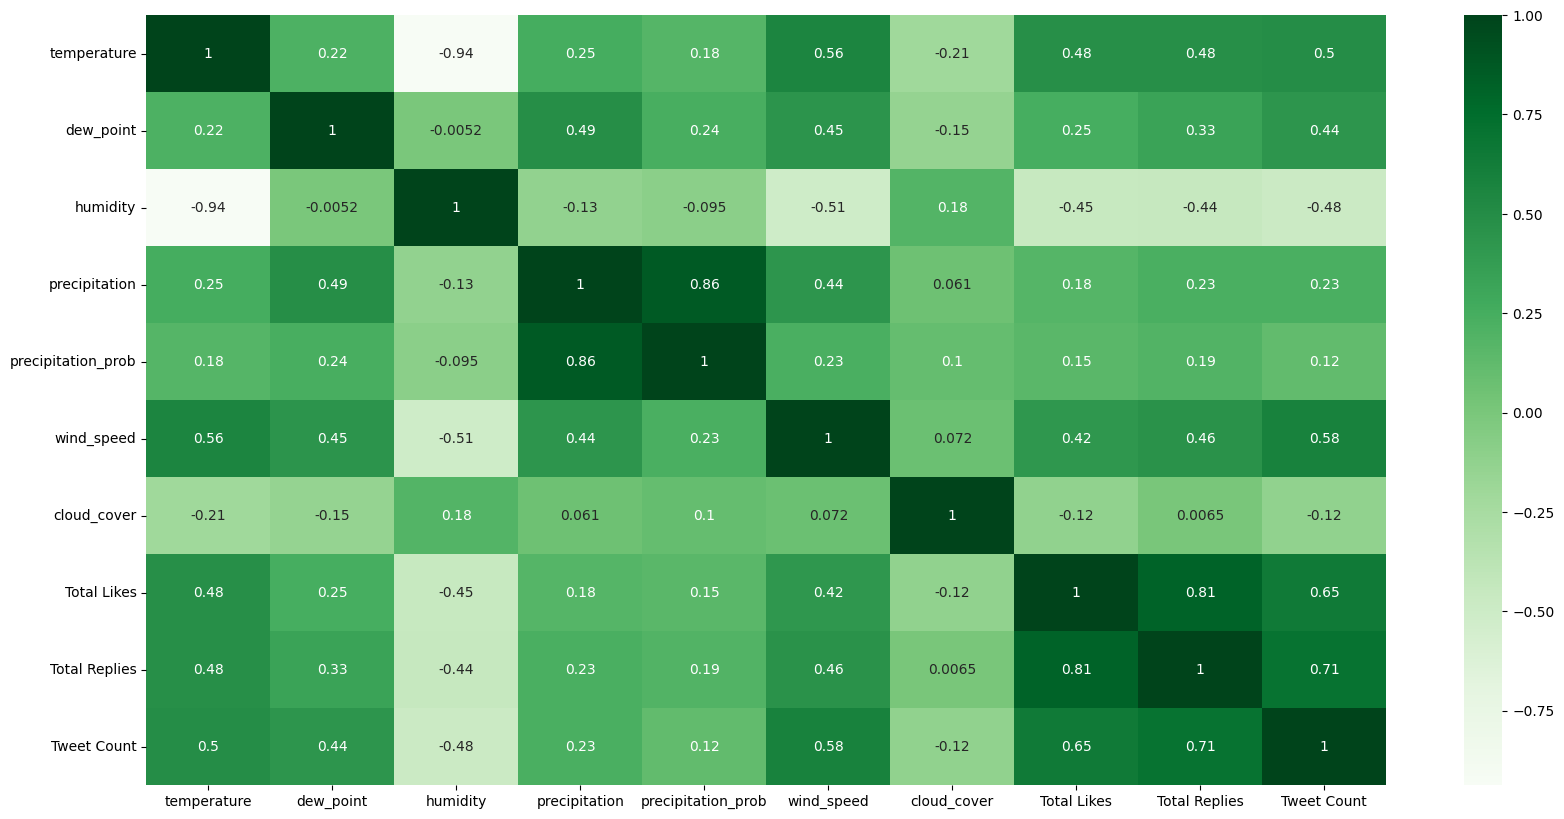

In [80]:
plt.figure(figsize=(20, 10))
sns.heatmap(hujan_corr.corr(method='spearman'), annot=True, cmap='Greens')
plt.show()

In [81]:
# Rename kolom 'Time Created' agar lebih mudah untuk join
hourly_panas = hourly_panas.rename(columns={'Time Created': 'datetime'})

# Lakukan merge (default: inner join)
merged_panas = pd.merge(data_weather, hourly_panas, on='datetime', how='inner')

# Tampilkan hasil merge
print(merged_panas)

               datetime  temperature  dew_point  humidity  precipitation  \
0   2024-11-16 12:00:00         30.9       22.7     61.71            0.8   
1   2024-11-16 13:00:00         30.8       22.7     62.07            1.3   
2   2024-11-16 14:00:00         30.4       22.8     63.89            0.0   
3   2024-11-16 15:00:00         29.5       23.1     68.52            2.3   
4   2024-11-16 16:00:00         28.4       23.1     73.02            2.8   
..                  ...          ...        ...       ...            ...   
97  2024-11-20 13:00:00         32.6       21.8     53.05            0.7   
98  2024-11-20 14:00:00         30.7       22.8     62.80            1.1   
99  2024-11-20 15:00:00         28.1       23.5     76.13            1.9   
100 2024-11-20 16:00:00         27.8       23.3     76.54            2.7   
101 2024-11-20 17:00:00         26.7       23.5     82.64            3.1   

     precipitation_prob  wind_speed  cloud_cover              conditions  \
0          

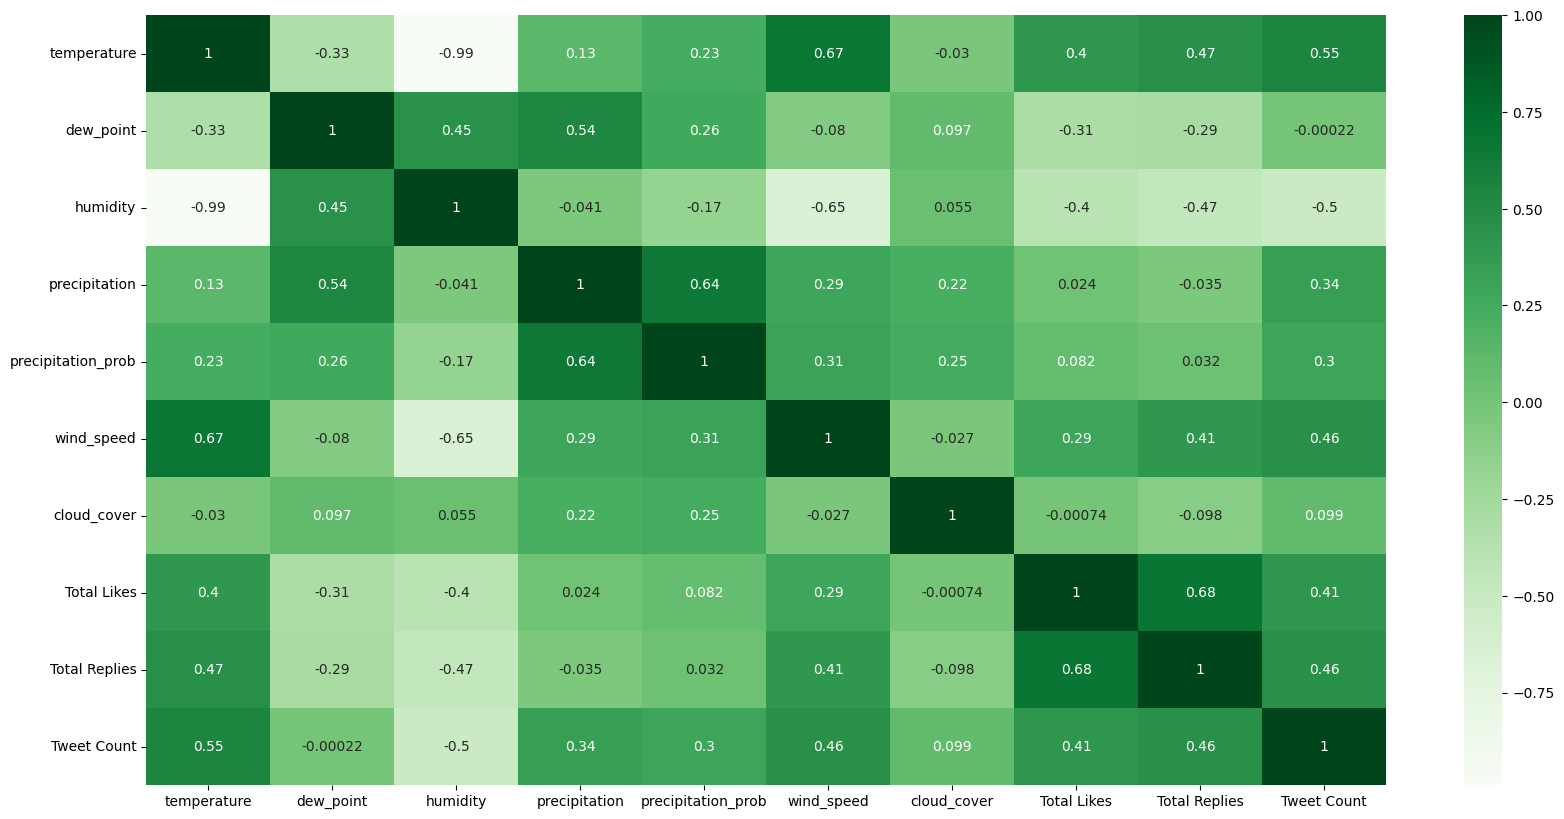

In [82]:
# heatmap of correlation between all the features and value, but exclude datetime and conditions
panas_corr = merged_panas.copy()
panas_corr = panas_corr.drop(['conditions', 'datetime'], axis = 1)

plt.figure(figsize=(20, 10))
sns.heatmap(panas_corr.corr(), annot=True, cmap='Greens')
plt.show()

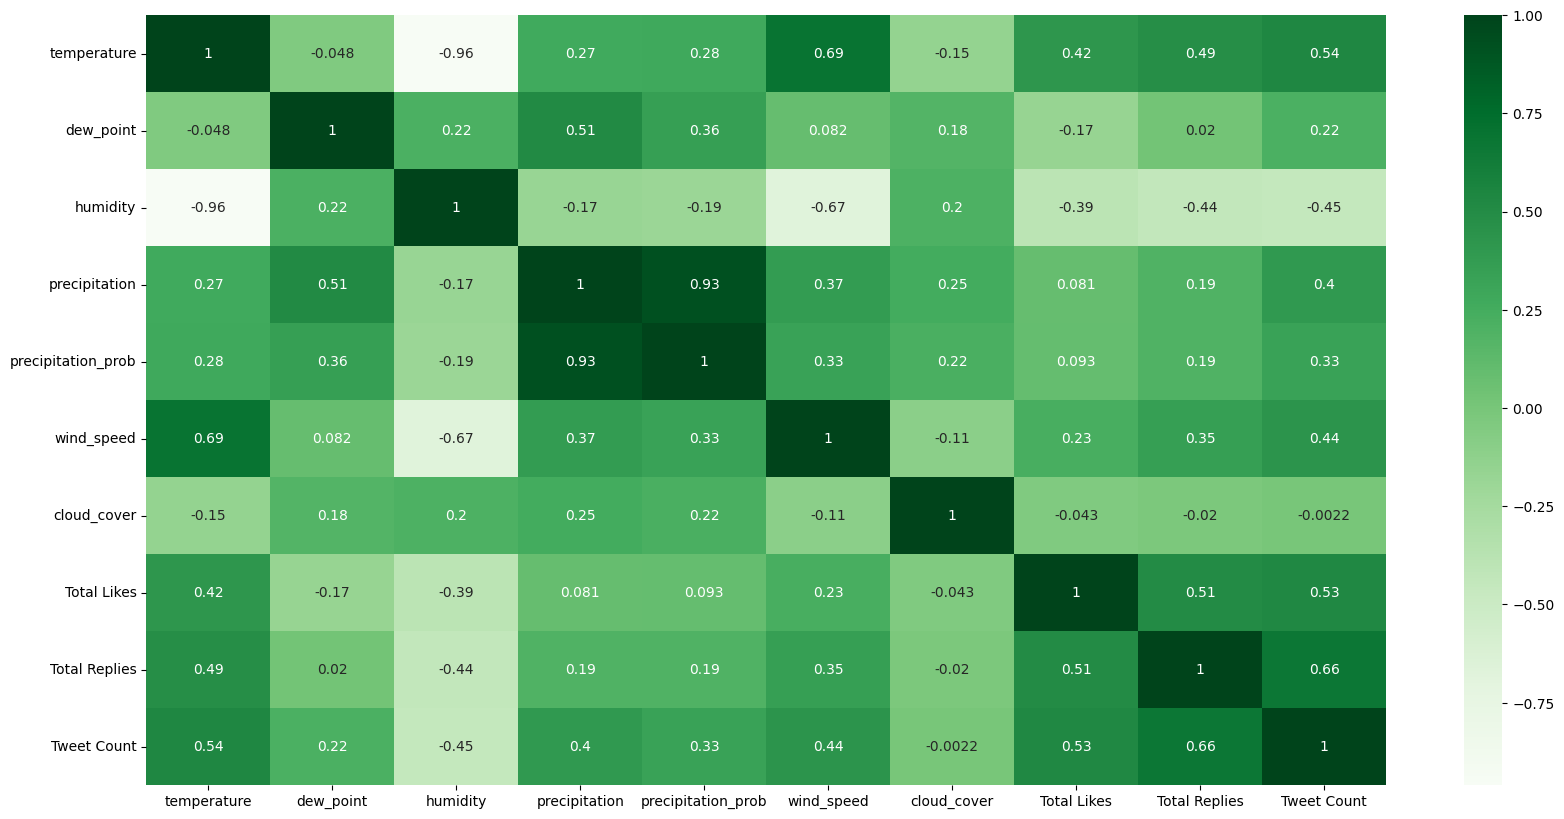

In [83]:
plt.figure(figsize=(20, 10))
sns.heatmap(panas_corr.corr(method='spearman'), annot=True, cmap='Greens')
plt.show()

In [84]:
# Rename kolom 'Time Created' agar lebih mudah untuk join
hourly_mendung = hourly_mendung.rename(columns={'Time Created': 'datetime'})

# Lakukan merge (default: inner join)
merged_mendung = pd.merge(data_weather, hourly_mendung, on='datetime', how='inner')

# Tampilkan hasil merge
print(merged_mendung)

               datetime  temperature  dew_point  humidity  precipitation  \
0   2024-11-16 00:00:00         24.6       22.6     88.64            0.3   
1   2024-11-16 01:00:00         24.3       22.6     90.25            0.3   
2   2024-11-16 02:00:00         24.4       22.4     88.63            0.0   
3   2024-11-16 03:00:00         24.3       22.6     90.25            0.3   
4   2024-11-16 04:00:00         23.9       22.6     92.44            1.7   
..                  ...          ...        ...       ...            ...   
109 2024-11-20 13:00:00         32.6       21.8     53.05            0.7   
110 2024-11-20 14:00:00         30.7       22.8     62.80            1.1   
111 2024-11-20 15:00:00         28.1       23.5     76.13            1.9   
112 2024-11-20 16:00:00         27.8       23.3     76.54            2.7   
113 2024-11-20 17:00:00         26.7       23.5     82.64            3.1   

     precipitation_prob  wind_speed  cloud_cover              conditions  \
0          

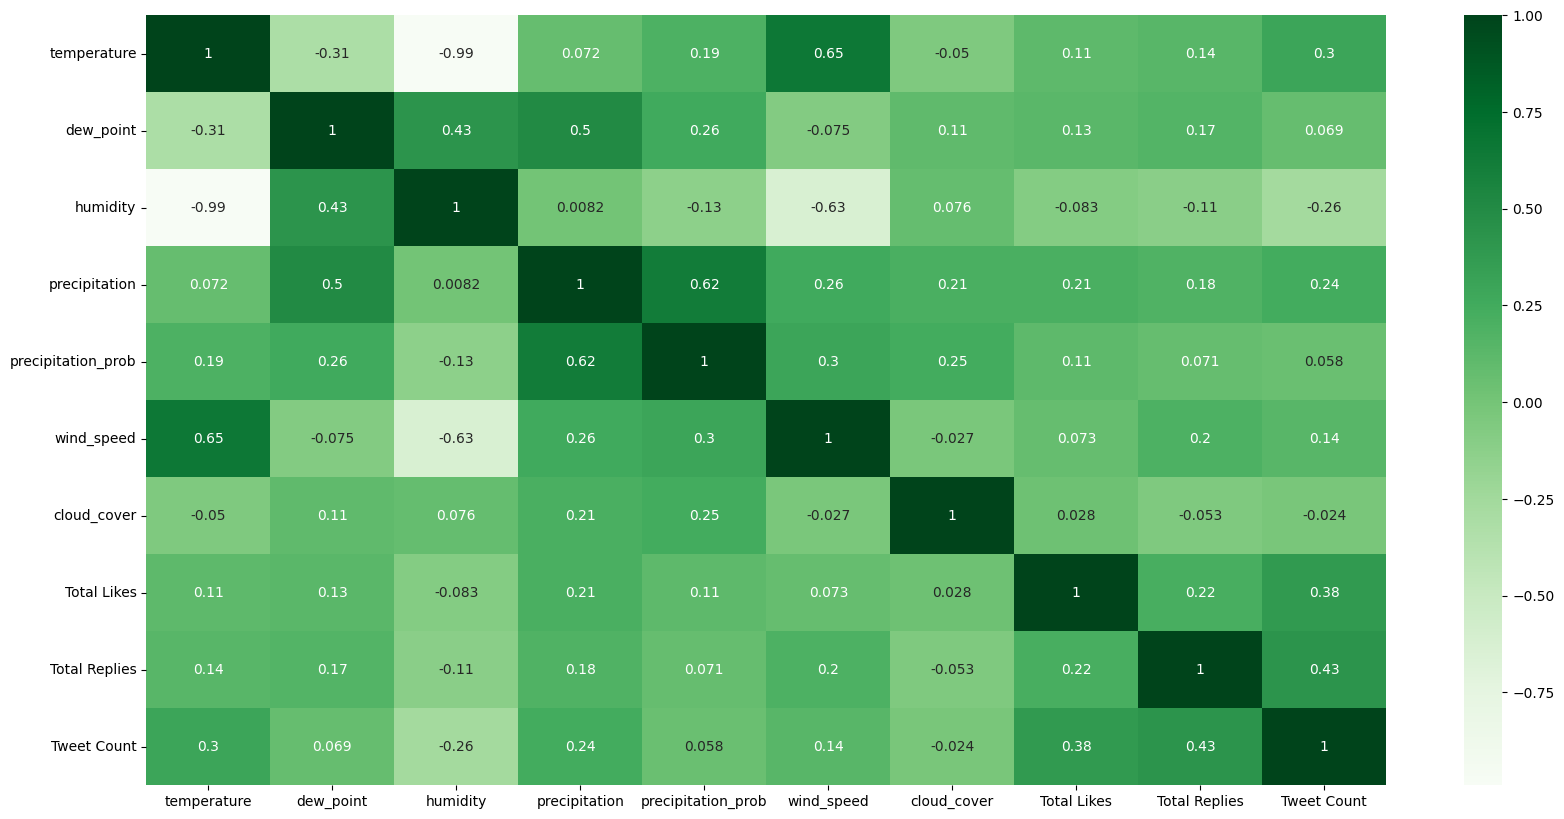

In [85]:
# heatmap of correlation between all the features and value, but exclude datetime and conditions
mendung_corr = merged_mendung.copy()
mendung_corr = mendung_corr.drop(['conditions', 'datetime'], axis = 1)

plt.figure(figsize=(20, 10))
sns.heatmap(mendung_corr.corr(), annot=True, cmap='Greens')
plt.show()

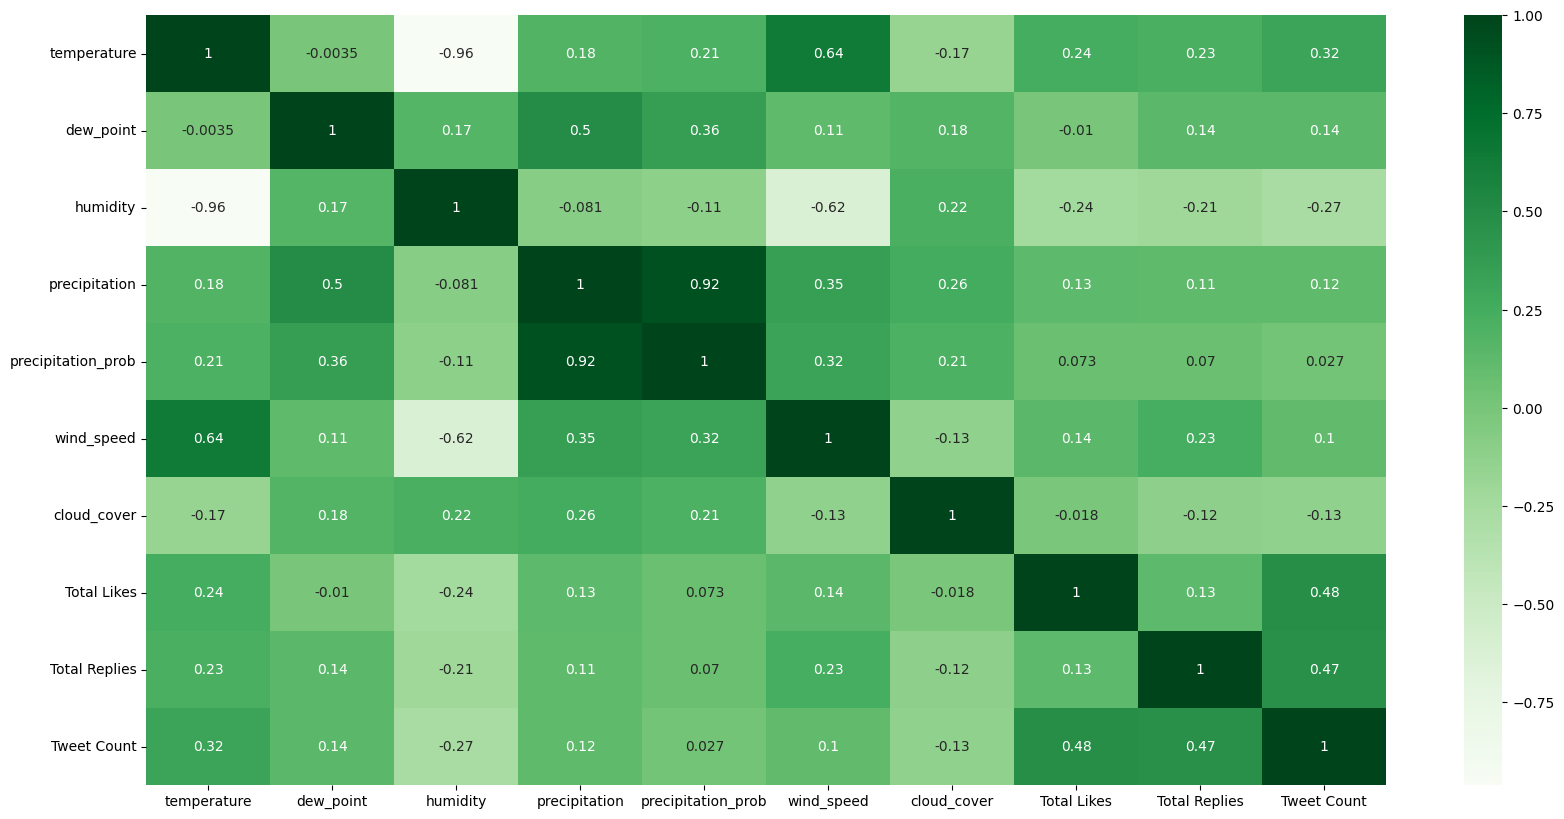

In [86]:
plt.figure(figsize=(20, 10))
sns.heatmap(mendung_corr.corr(method='spearman'), annot=True, cmap='Greens')
plt.show()

## Regression Plots

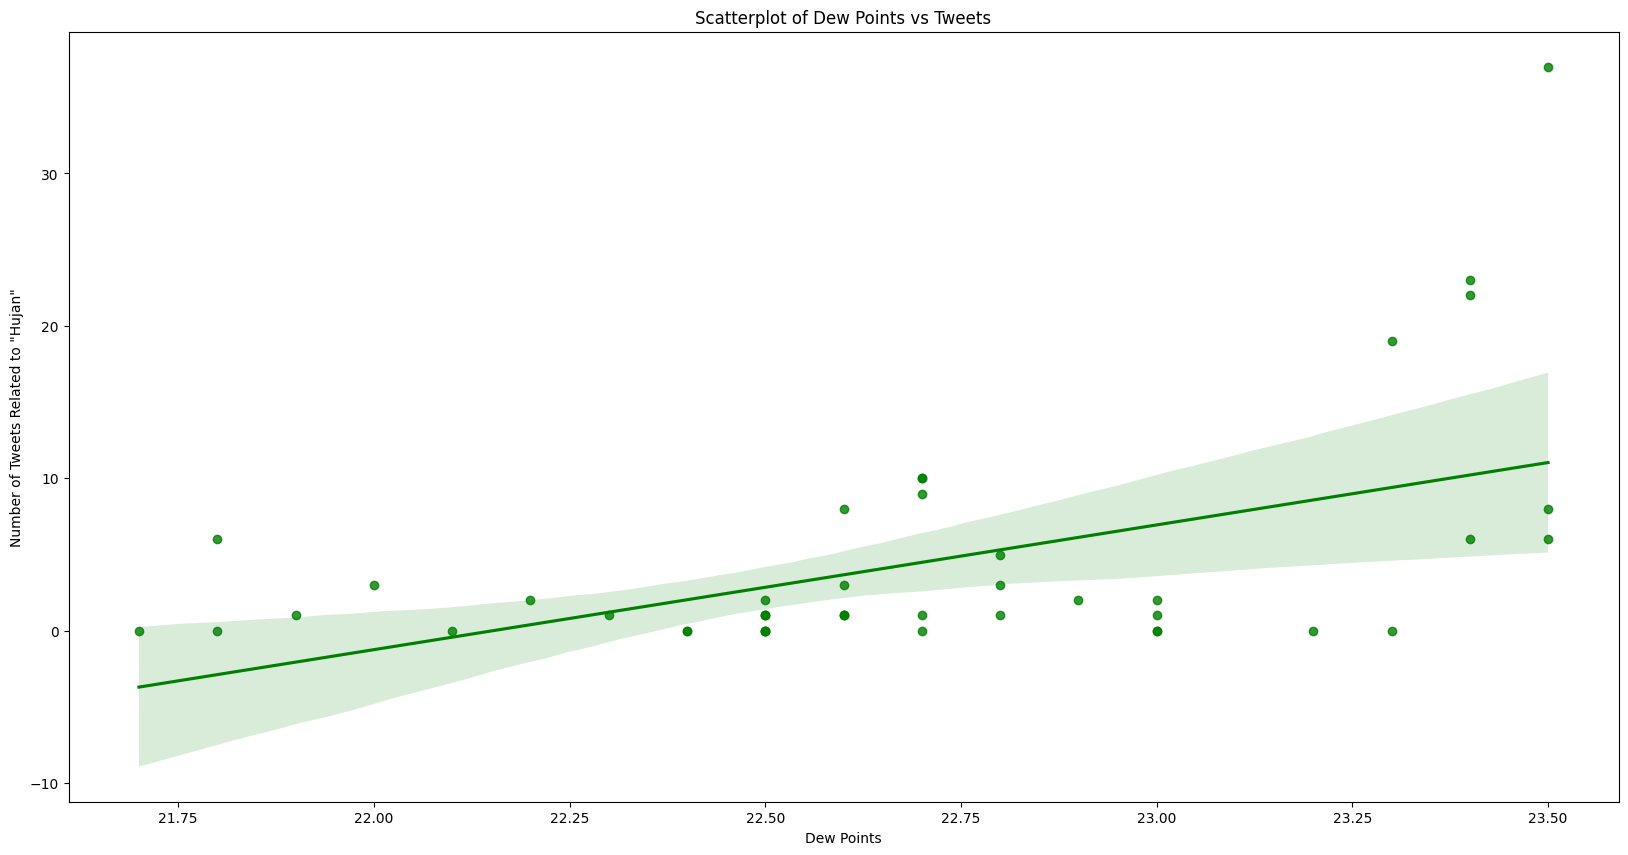

In [87]:
# Dew Points vs "Hujan" Tweets
plt.figure(figsize=(20, 10))
sns.regplot(x=merged_hujan['dew_point'], y=merged_hujan['Tweet Count'], color='green')
plt.xlabel('Dew Points')
plt.ylabel('Number of Tweets Related to "Hujan"')
plt.title('Scatterplot of Dew Points vs Tweets')
plt.show()

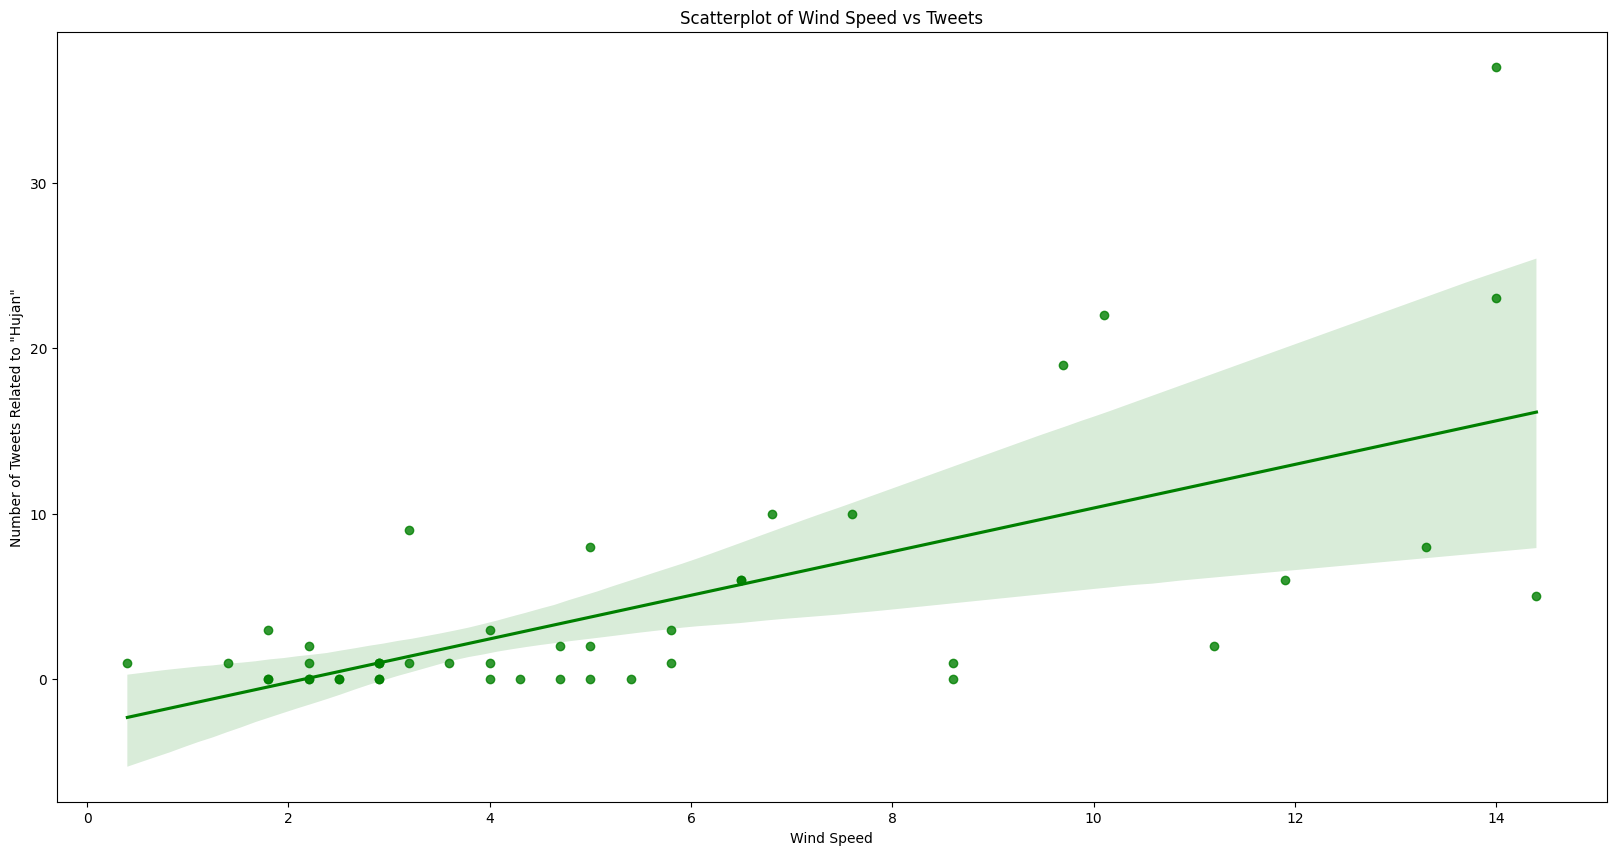

In [88]:
# Wind Speed vs "Hujan" Tweets
plt.figure(figsize=(20, 10))
sns.regplot(x=merged_hujan['wind_speed'], y=merged_hujan['Tweet Count'], color='green')
plt.xlabel('Wind Speed')
plt.ylabel('Number of Tweets Related to "Hujan"')
plt.title('Scatterplot of Wind Speed vs Tweets')
plt.show()

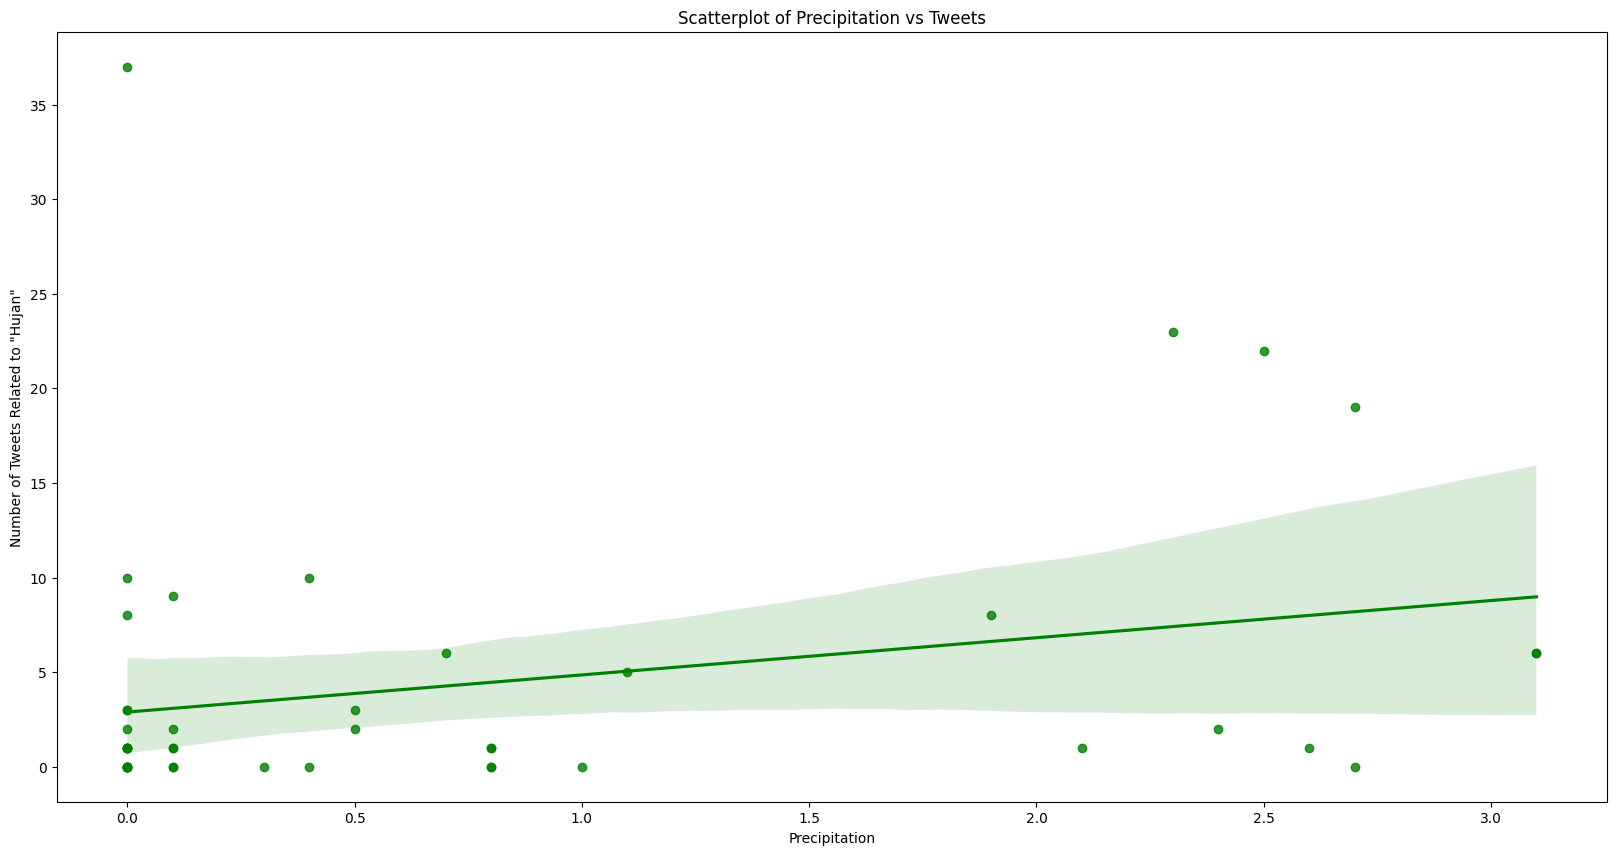

In [89]:
# Precipitation vs "Hujan" Tweets
plt.figure(figsize=(20, 10))
sns.regplot(x=merged_hujan['precipitation'], y=merged_hujan['Tweet Count'], color='green')
plt.xlabel('Precipitation')
plt.ylabel('Number of Tweets Related to "Hujan"')
plt.title('Scatterplot of Precipitation vs Tweets')
plt.show()

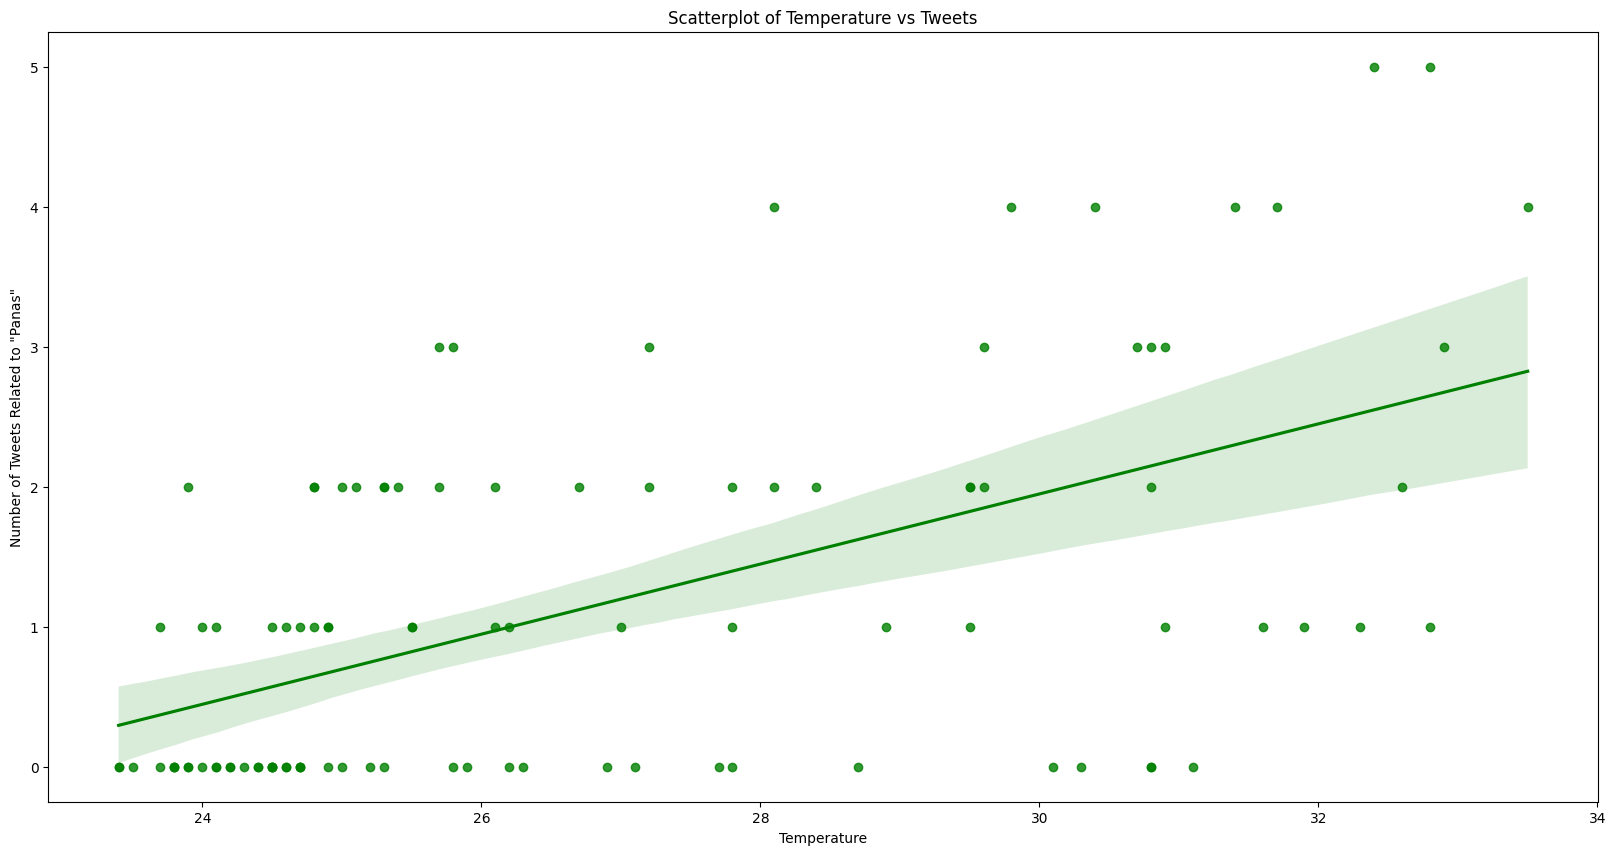

In [90]:
# Temperature vs "Panas" Tweets
plt.figure(figsize=(20, 10))
sns.regplot(x=merged_panas['temperature'], y=merged_panas['Tweet Count'], color='green')
plt.xlabel('Temperature')
plt.ylabel('Number of Tweets Related to "Panas"')
plt.title('Scatterplot of Temperature vs Tweets')
plt.show()

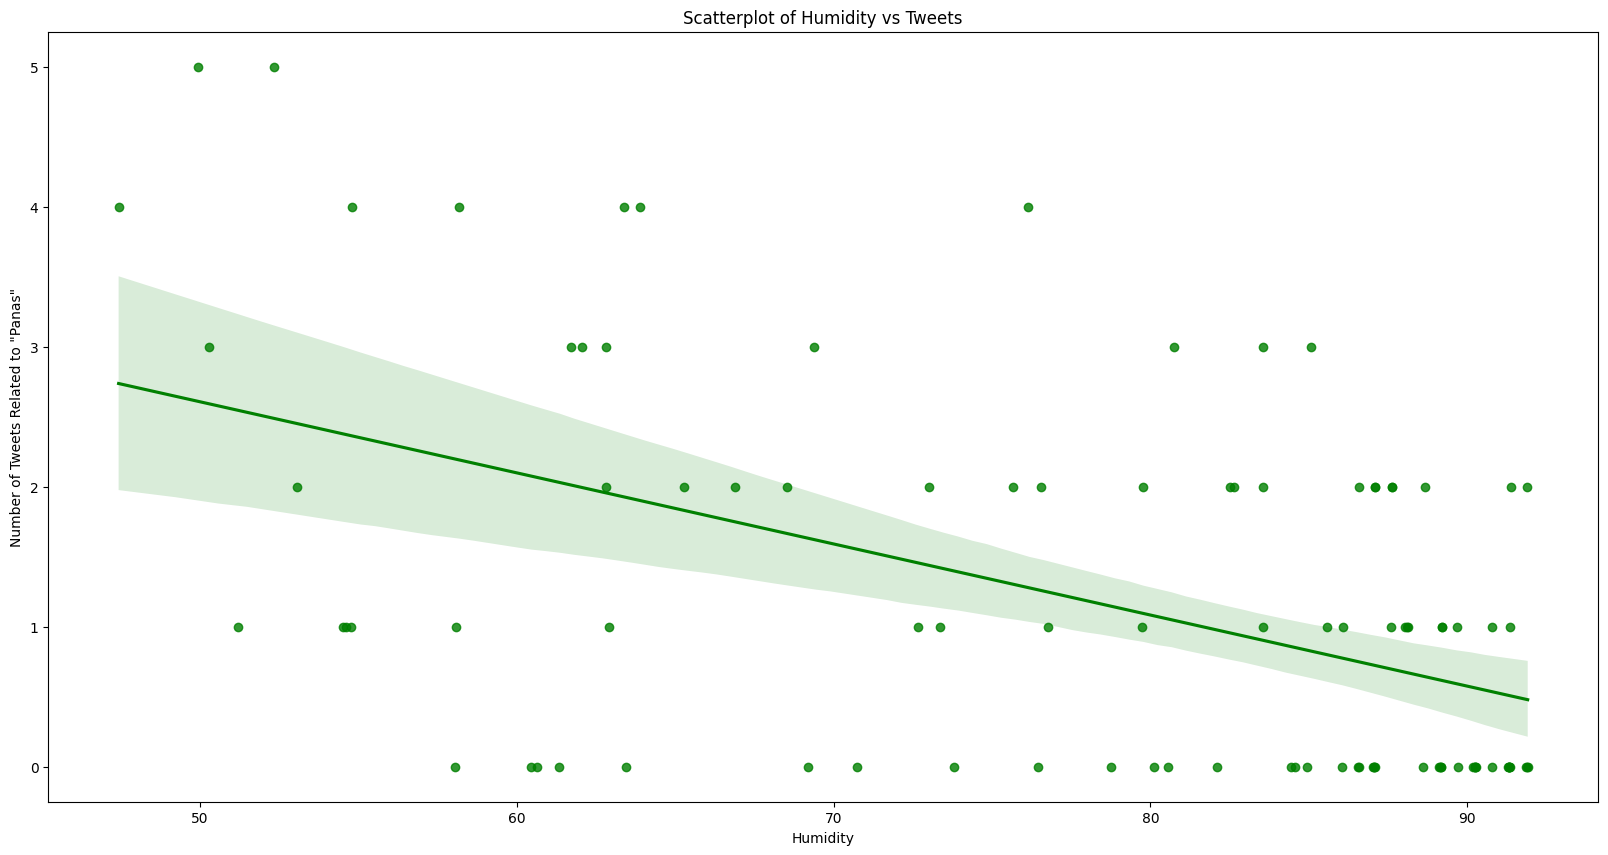

In [91]:
# Humidity vs "Panas" Tweets
plt.figure(figsize=(20, 10))
sns.regplot(x=merged_panas['humidity'], y=merged_panas['Tweet Count'], color='green')
plt.xlabel('Humidity')
plt.ylabel('Number of Tweets Related to "Panas"')
plt.title('Scatterplot of Humidity vs Tweets')
plt.show()

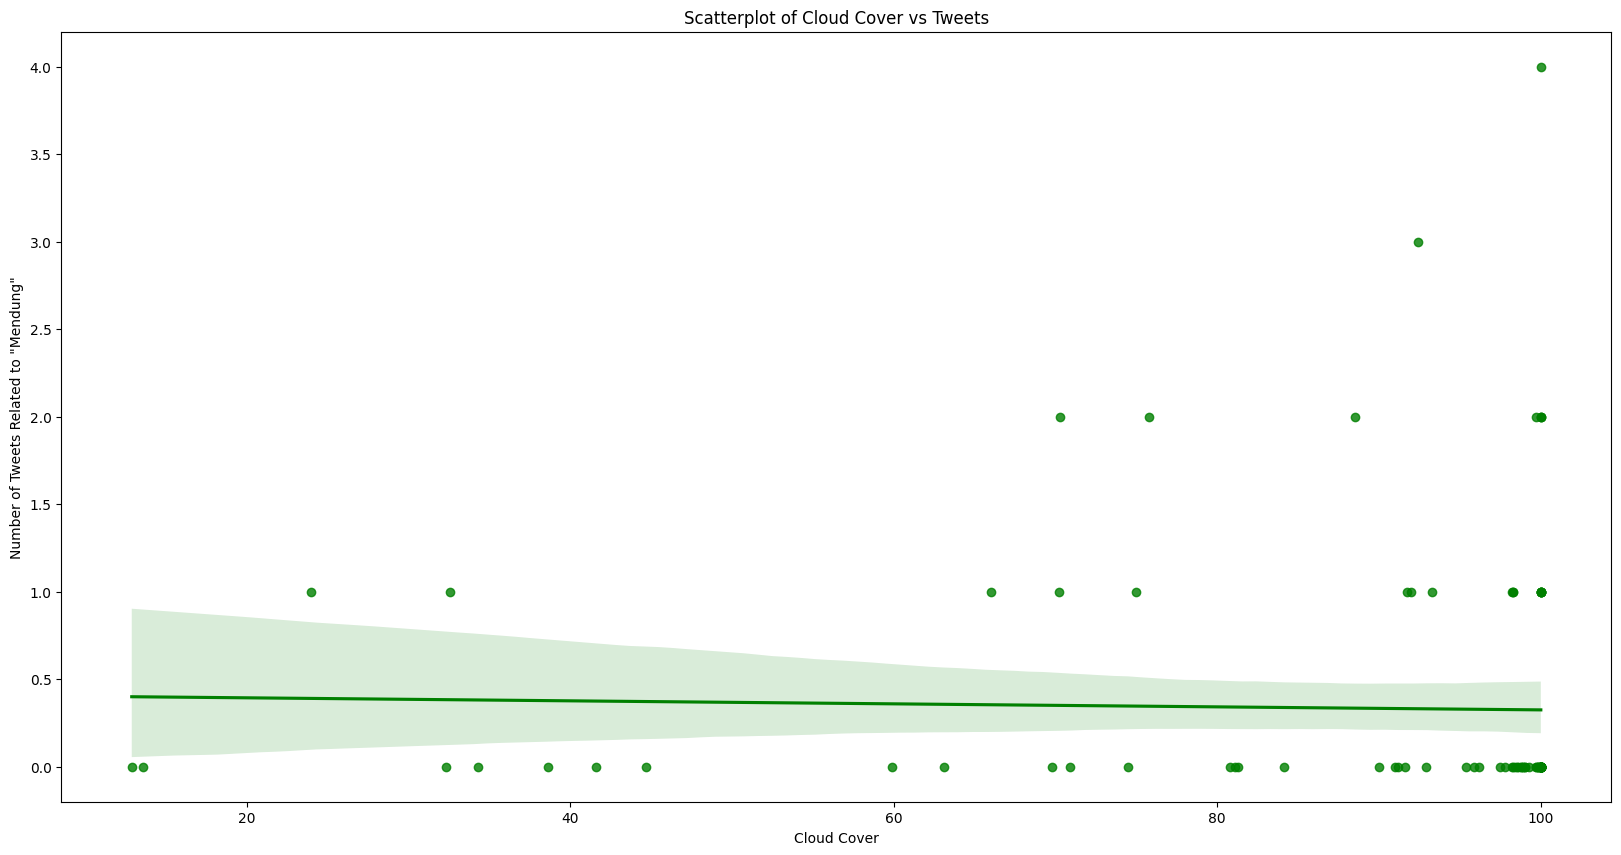

In [92]:
# Cloud Cover vs "Mendung" Tweets
plt.figure(figsize=(20, 10))
sns.regplot(x=merged_mendung['cloud_cover'], y=merged_mendung['Tweet Count'], color='green')
plt.xlabel('Cloud Cover')
plt.ylabel('Number of Tweets Related to "Mendung"')
plt.title('Scatterplot of Cloud Cover vs Tweets')
plt.show()

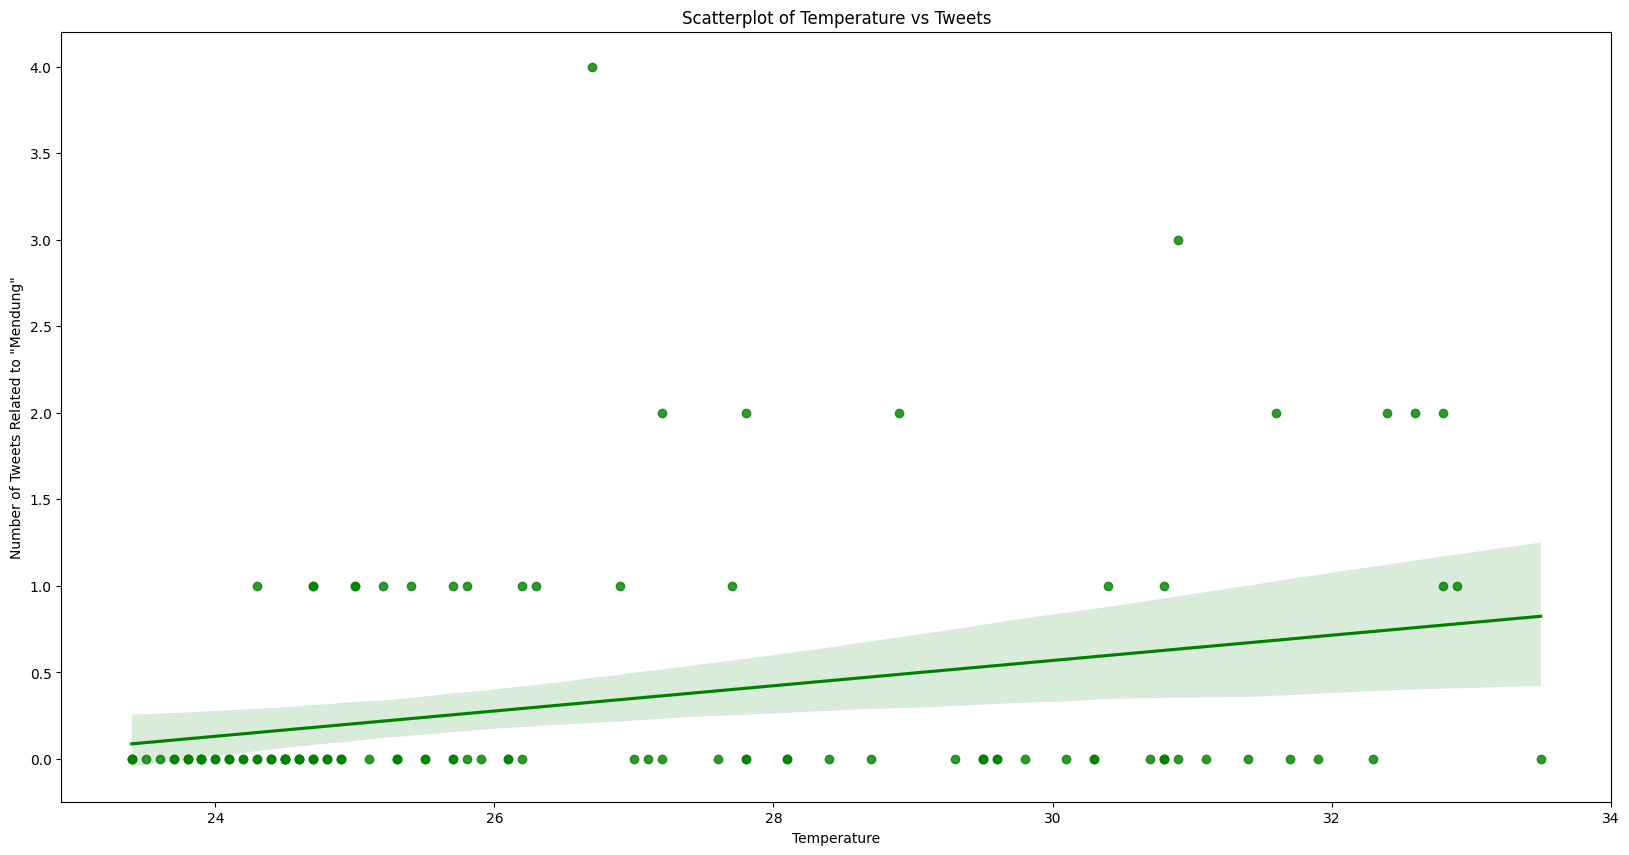

In [93]:
# Temperature vs "Mendung" Tweets
plt.figure(figsize=(20, 10))
sns.regplot(x=merged_mendung['temperature'], y=merged_mendung['Tweet Count'], color='green')
plt.xlabel('Temperature')
plt.ylabel('Number of Tweets Related to "Mendung"')
plt.title('Scatterplot of Temperature vs Tweets')
plt.show()

#**Kesimpulan Analisis**

##1.Tweet Terkait Hujan:

- Variabel: Poin embun (dew points), kecepatan angin, dan presipitasi menunjukkan tren positif terhadap jumlah tweet terkait hujan.
- Observasi Utama:
Peningkatan presipitasi diikuti oleh meningkatnya jumlah tweet tentang "hujan," kemungkinan karena orang cenderung mengekspresikan pengalaman atau perhatian mereka saat hujan.
Poin embun dan kecepatan angin berkorelasi positif dengan tweet tentang hujan. Poin embun tinggi menandakan kelembapan yang memicu hujan, yang menjadi perhatian publik.
- Pola Potensial: Faktor cuaca langsung memengaruhi keterlibatan pengguna di media sosial terkait hujan.

##2. Tweet Terkait Mendung:

- Variabel: Tutupan awan (cloud cover) dan suhu (temperature).
- Observasi Utama:
Tutupan awan berkorelasi positif dengan tweet yang menyebutkan "mendung." Semakin banyak tutupan awan, tweet cenderung meningkat meski dalam skala kecil, menunjukkan perhatian masyarakat pada kondisi langit yang mendung.
Korelasi yang lemah mengindikasikan bahwa kondisi mendung saja tidak cukup kuat memicu keterlibatan online, kecuali digabungkan dengan fenomena cuaca signifikan lainnya.
- Pola Potensial: Langit mendung menjadi perhatian masyarakat tetapi tidak terlalu dominan sebagai pemicu diskusi publik.

##3. Tweet Terkait Panas:
- Variabel: Suhu dan kelembapan (humidity).
- Observasi Utama:
Suhu yang tinggi memicu lebih banyak tweet tentang "panas," mencerminkan ketidaknyamanan atau kesadaran yang lebih tinggi selama hari-hari yang panas.
Kelembapan menunjukkan tren negatif dengan tweet tentang panas, mungkin karena panas kering lebih terasa dibandingkan panas lembap.
- Pola Potensial: Suhu ekstrem, terutama panas kering, mendorong lebih banyak interaksi online, menunjukkan sensitivitas publik terhadap ketidaknyamanan.

##Kesimpulan Umum:
- Analisis ini menunjukkan bahwa kondisi cuaca tertentu (hujan, panas) memiliki dampak signifikan terhadap aktivitas media sosial, mencerminkan sensitivitas masyarakat terhadap perubahan cuaca.
- Jadi, korelasi positif (misalnya, hujan dengan poin embun dan kecepatan angin) menunjukkan hubungan yang andal, sedangkan korelasi lemah (misalnya, tutupan awan) menunjukkan pemicu perilaku yang lebih rendah.
Insight yang Dapat Ditindaklanjuti: Mengintegrasikan data cuaca real-time ke dalam platform dapat memprediksi dan menyesuaikan puncak keterlibatan pengguna, memungkinkan interaksi atau pemberitahuan yang lebih terarah.